In [1]:
from specim_test.specim.specfuncs import spec2d, spec1d
from astropy.io import fits as pf
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
file_loc = 'J1251_DEIMOS_spectra/*'

In [3]:
spec2d_det2 = []
spec2d_det6 = []

for fl in glob.glob(file_loc):
    if 'clean' in fl:
        if 'det2' in fl:
            spec2d_det2.append(fl)
        elif 'det6' in fl:
            spec2d_det6.append(fl)

In [6]:
spec2d_det2 = sorted(spec2d_det2)
spec2d_det6 = sorted(spec2d_det6)
spec2d_det2, spec2d_det6

(['J1251_DEIMOS_spectra/J1251_deimos_det2_d0613_0078_clean.fits',
  'J1251_DEIMOS_spectra/J1251_deimos_det2_d0613_0079_clean.fits',
  'J1251_DEIMOS_spectra/J1251_deimos_det2_d0614_0071_clean.fits',
  'J1251_DEIMOS_spectra/J1251_deimos_det2_d0615_0073_clean.fits',
  'J1251_DEIMOS_spectra/J1251_deimos_det2_d0615_0074_clean.fits'],
 ['J1251_DEIMOS_spectra/J1251_deimos_det6_d0613_0078_clean.fits',
  'J1251_DEIMOS_spectra/J1251_deimos_det6_d0613_0079_clean.fits',
  'J1251_DEIMOS_spectra/J1251_deimos_det6_d0614_0071_clean.fits',
  'J1251_DEIMOS_spectra/J1251_deimos_det6_d0615_0073_clean.fits',
  'J1251_DEIMOS_spectra/J1251_deimos_det6_d0615_0074_clean.fits'])

In [110]:
spec = spec2d.Spec2d(spec2d_det2[0], hext=1, varext=2)#, xtrim=[20, 80])


Loading file J1251_DEIMOS_spectra/J1251_deimos_det2_d0613_0078_clean.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J1251_DEIMOS_spectra/J1251_deimos_det2_d0613_0078_clean.fits (HDU=1)
Final data dimensions (x y): 101 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 101




Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


Dispersion : 0.480000
Found 367892 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


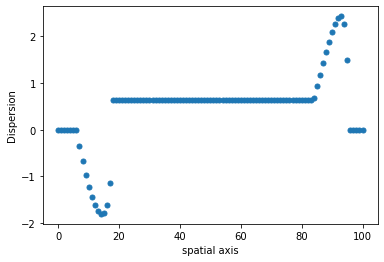

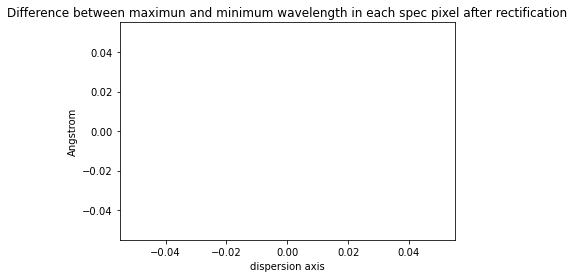

In [111]:
spec.set_dispaxis('y')
spec.do_waverect(doplot=True, resamp_ord=5)


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


Dispersion : 0.630000
Found 60 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


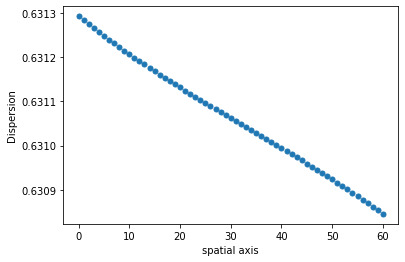

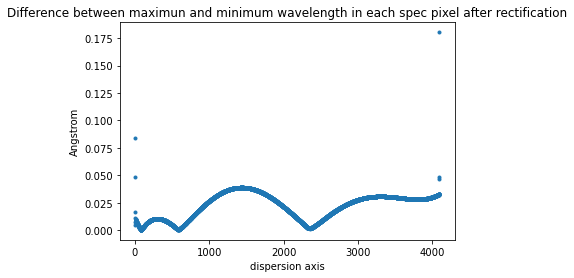

In [21]:
spec.set_dispaxis('y')
spec.do_waverect(doplot=True, resamp_ord=5)

Profile max value (before normalization) 363.325623


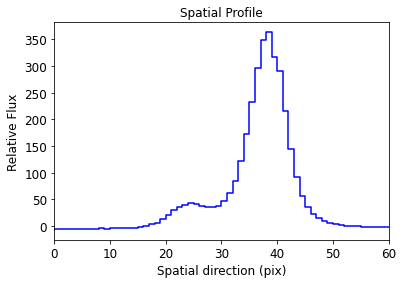

In [22]:
profile = spec.spatial_profile(pixrange=[2100, 2500])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : -3

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 360, 39, 3, 4

amplitude=360.000000, x_0=39.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 35, 32.5, 2, 3

amplitude=35.000000, x_0=32.500000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 3 : 45, 23, 3, 4

amplitude=45.000000, x_0=23.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-8.17549482)>

    [1]: <Moffat1D(amplitude=35

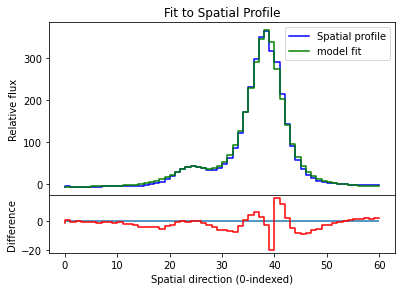

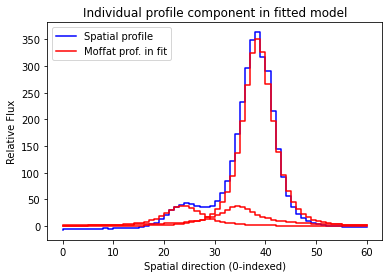


Do you want to start over ? : type yes/no
no


In [65]:
mod0 = spec.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-8.17549482)>

    [1]: <Moffat1D(amplitude=350.43436368, x_0=39.00834087, gamma=5.11241438, alpha=1.95075944)>

    [2]: <Moffat1D(amplitude=37.71214015, x_0=35.15199576, gamma=3.55254198, alpha=0.72814814)>

    [3]: <Moffat1D(amplitude=38.47735809, x_0=24.33098632, gamma=5.11003167, alpha=1.36737845)>
Parameters:
           c0_0          amplitude_1    ...     gamma_3           alpha_3      
    ----------------- ----------------- ... ---------------- ------------------
    -8.17549481889228 350.4343636762233 ... 5.11003166944162 1.3673784478917062

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-3.67914868)>

    [1]: <Moffat1D(amplitude=359

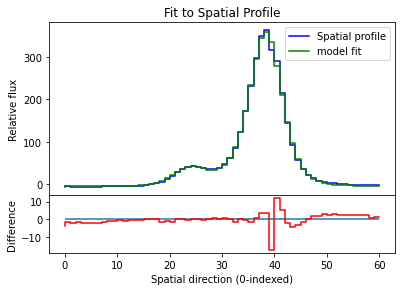

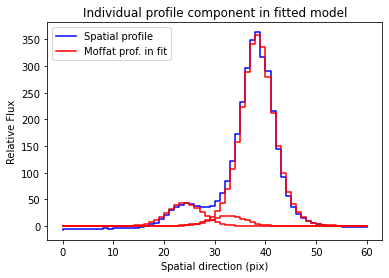

<CompoundModel(c0_0=-3.67914868, amplitude_1=359.1460784, x_0_1=38.92436081, gamma_1=7.75860811, alpha_1=3.59878926, amplitude_2=19.41464239, x_0_2=33.27035237, gamma_2=17.34388368, alpha_2=13.70524028, amplitude_3=43.27905068, x_0_3=24.57836924, gamma_3=17.34388368, alpha_3=13.70524028)>

In [66]:
def tie_pos1_moffat(model):
     return model.x_0_1 - (0.67/0.1185) # 0.77 1.12
            
def tie_pos2_moffat(model):
    return model.x_0_1 - (1.70/0.1185)

def tie_pos3_moffat(model):
    return model.x_0_4 + (1.70/0.1185)

def tie_gamma_moffat(model):
    return model.gamma_3

def tie_alpha_moffat(model):
    return model.alpha_3 

#spec.mod0[1].mean.tied = tie_pos3_moffat
spec.mod0[2].x_0.tied = tie_pos1_moffat
spec.mod0[3].x_0.tied = tie_pos2_moffat
#spec.mod0[2].x_0.tied = tie_pos3_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
spec.mod0[2].gamma.tied = tie_gamma_moffat
spec.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[1].gamma.tied = tie_gamma_moffat
#spec.mod0[1].alpha.tied = tie_alpha_moffat
spec.refined_model(mod0)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2
Fitting polynomial of degree 4 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3


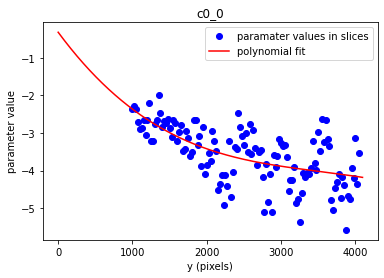

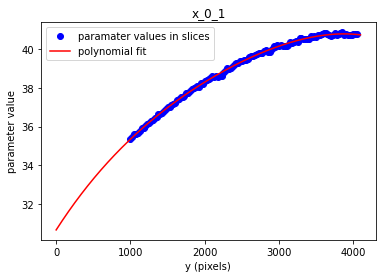

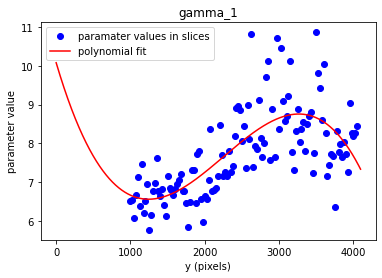

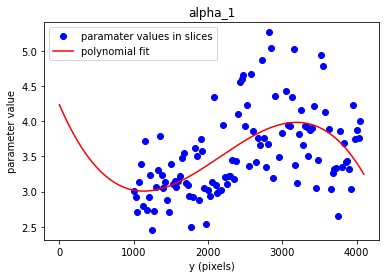

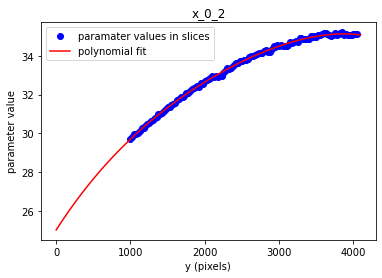

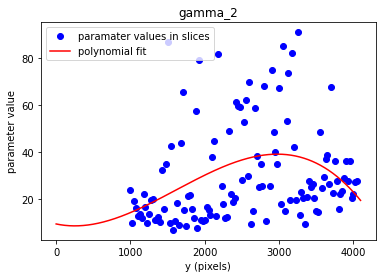

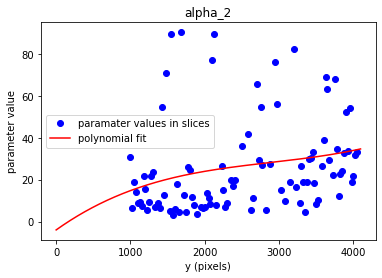

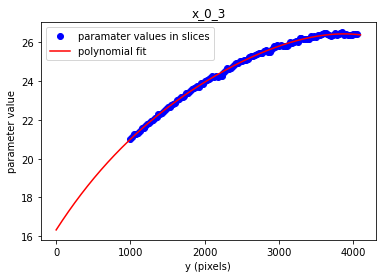

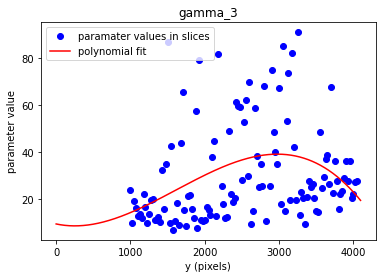

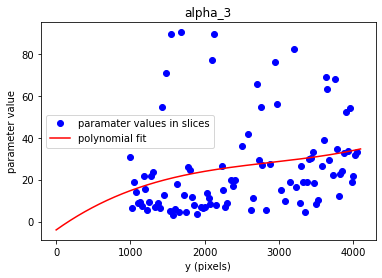

In [68]:
spec.find_and_trace(spec.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4, 'x_0_4':4, 'mean_1':4},
                    fitrange=[1000, 4100], polyorder=3)

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 1000 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5135.84
 Spectrum End:     7085.91
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63

 Spectrum Start:  5135.84
 Spectrum End:     7085.91
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63

 Spectrum Start:  5135.84
 Spectrum End:     7085.91
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63


Plotting the spectrum


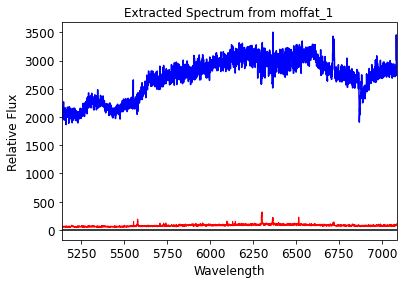

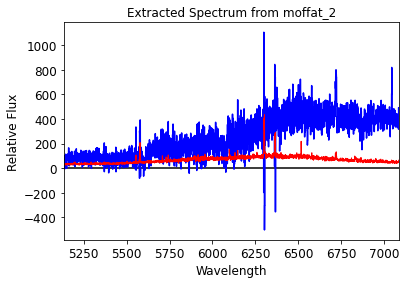

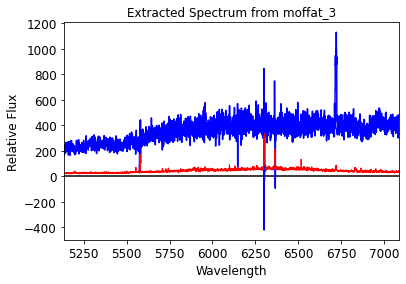

In [69]:
spec.extract(method='modelfit', extrange=[1000, -1])#[1000, -1]

In [70]:
spec_d = spec1d.Spec1d(wav=spec.spectra[1][1]['wav'], flux=spec.spectra[1][1]['flux'],
                    var=spec.spectra[1][1]['var'])

 Spectrum Start:  5135.84
 Spectrum End:     7085.91
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5287.50
[Fe VII]      3761.40       5303.57
H-iota        3770.00       5315.70
H-theta       3797.00       5353.77
H-eta         3835.00       5407.35
CN bandhd     3883.00       5475.03
CaII K        3933.67       5546.47
CaII H        3968.47       5595.54
H-delta       4101.00       5782.41
G-band        4305.00       6070.05
H-gamma       4340.00       6119.40
Fe4383        4383.00       6180.03
Ca4455        4455.00       6281.55
Fe4531        4531.00       6388.71
H-beta        4861.00       6854.01



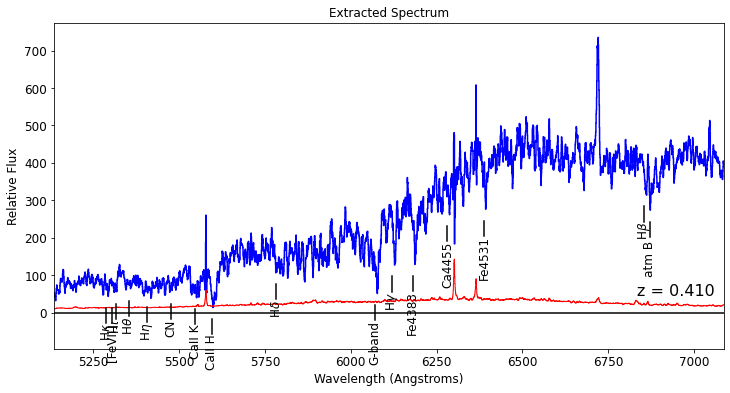

In [83]:
fg = plt.figure(figsize=(12, 6))
spec_d.smooth(7, fig=fg)
spec_d.mark_lines('abs', z=0.41, usesmooth=True, markatm=True, excludeline=['atm A'])

In [76]:
spec_im = spec1d.Spec1d(wav=spec.spectra[0][1]['wav'], flux=spec.spectra[0][1]['flux'],
                    var=spec.spectra[0][1]['var'])

 Spectrum Start:  5135.84
 Spectrum End:     7085.91
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63




Line        lambda_rest  lambda_obs
----------  -----------  -----------
[O II]        3726.03       6714.31
[O II]        3728.82       6719.33


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg I          2852.00       5139.30
H-kappa       3750.00       6757.50
[Fe VII]      3761.40       6778.04
H-iota        3770.00       6793.54
H-theta       3797.00       6842.19
H-eta         3835.00       6910.67
CN bandhd     3883.00       6997.17



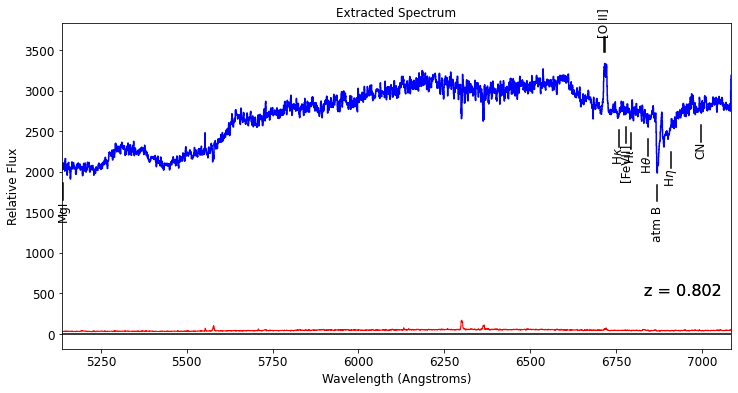

In [82]:
fg = plt.figure(figsize=(12, 6))
spec_im.smooth(3, fig=fg)
spec_im.mark_lines('strongem', z=0.802, usesmooth=True, markatm=False)
spec_im.mark_lines('abs', z=0.802, usesmooth=True, markatm=True, excludeline=['atm A'])

In [112]:
spec1 = spec2d.Spec2d(spec2d_det6[0], hext=1, varext=2)#, xtrim=[21, 81])


Loading file J1251_DEIMOS_spectra/J1251_deimos_det6_d0613_0078_clean.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J1251_DEIMOS_spectra/J1251_deimos_det6_d0613_0078_clean.fits (HDU=1)
Final data dimensions (x y): 106 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 106




Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


Dispersion : 0.530000
Found 376627 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


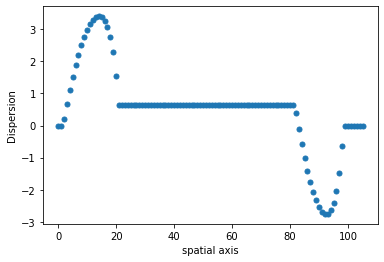

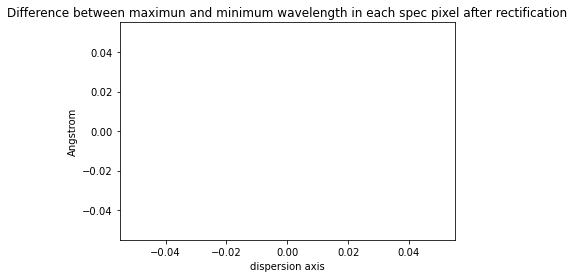

In [113]:
spec1.set_dispaxis('y')
spec1.do_waverect(doplot=True)


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


Dispersion : 0.650000
Found 2123 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


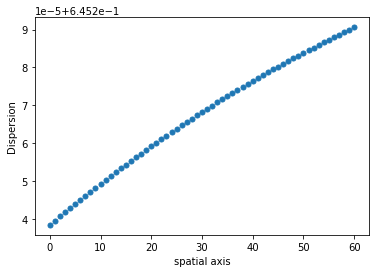

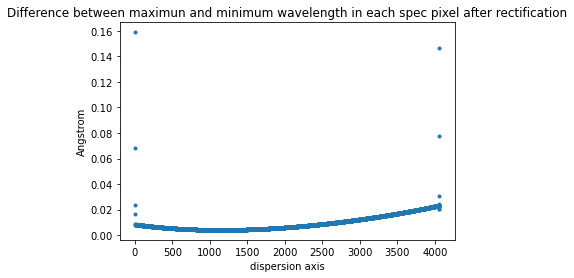

In [92]:
spec1.set_dispaxis('y')
spec1.do_waverect(doplot=True)

Profile max value (before normalization) 298.547546


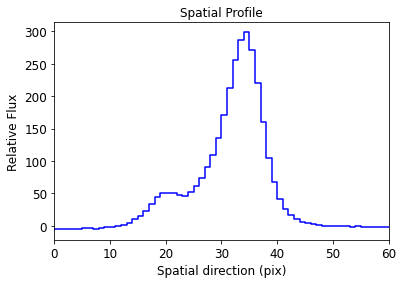

In [96]:
profile1 = spec1.spatial_profile(pixrange=[2100, 2500])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : -3

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 298, 35, 3, 4

amplitude=298.000000, x_0=35.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 35, 28.5, 2, 3

amplitude=35.000000, x_0=28.500000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 3 : 46, 21, 3, 4

amplitude=46.000000, x_0=21.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-6.0764701)>

    [1]: <Moffat1D(amplitude=279

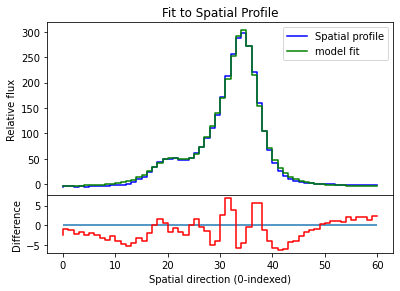

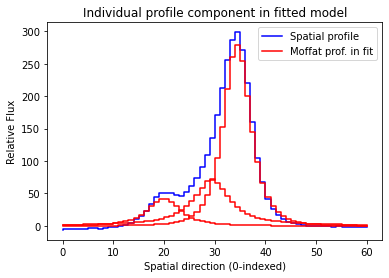


Do you want to start over ? : type yes/no
no


In [97]:
mod0 = spec1.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-6.0764701)>

    [1]: <Moffat1D(amplitude=279.29589551, x_0=34.9189985, gamma=4.87848364, alpha=1.97010898)>

    [2]: <Moffat1D(amplitude=71.68757681, x_0=29.89578599, gamma=3.97622361, alpha=0.9437459)>

    [3]: <Moffat1D(amplitude=42.03005117, x_0=20.50513781, gamma=5.08027113, alpha=1.53394052)>
Parameters:
           c0_0           amplitude_1    ...      gamma_3           alpha_3      
    ------------------ ----------------- ... ----------------- ------------------
    -6.076470102365437 279.2958955076468 ... 5.080271128063503 1.5339405215705892

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-2.70880741)>

    [1]: <Moffat1D(amplitude=

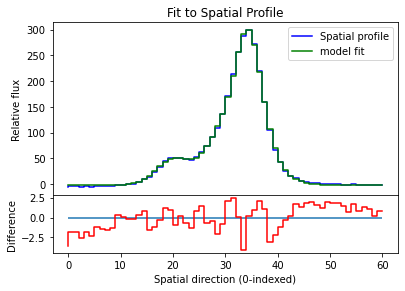

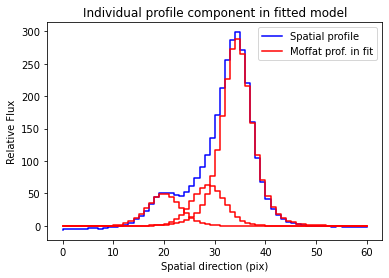

<CompoundModel(c0_0=-2.70880741, amplitude_1=287.75014379, x_0_1=34.90733893, gamma_1=6.6331311, alpha_1=3.00990509, amplitude_2=62.91223826, x_0_2=29.25333049, gamma_2=16.24682917, alpha_2=13.05717067, amplitude_3=49.58623856, x_0_3=20.56134737, gamma_3=16.24682917, alpha_3=13.05717067)>

In [98]:
def tie_pos1_moffat(model):
     return model.x_0_1 - (0.67/0.1185) # 0.77 1.12
            
def tie_pos2_moffat(model):
    return model.x_0_1 - (1.70/0.1185)

def tie_pos3_moffat(model):
    return model.x_0_4 + (1.70/0.1185)

def tie_gamma_moffat(model):
    return model.gamma_3

def tie_alpha_moffat(model):
    return model.alpha_3 

#spec.mod0[1].mean.tied = tie_pos3_moffat
spec1.mod0[2].x_0.tied = tie_pos1_moffat
spec1.mod0[3].x_0.tied = tie_pos2_moffat
#spec.mod0[2].x_0.tied = tie_pos3_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
spec1.mod0[2].gamma.tied = tie_gamma_moffat
spec1.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[1].gamma.tied = tie_gamma_moffat
#spec.mod0[1].alpha.tied = tie_alpha_moffat
spec1.refined_model(spec1.mod0)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2
Fitting polynomial of degree 4 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3


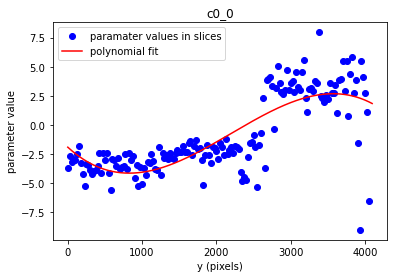

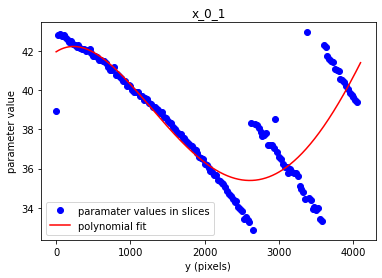

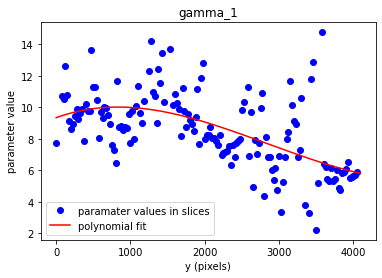

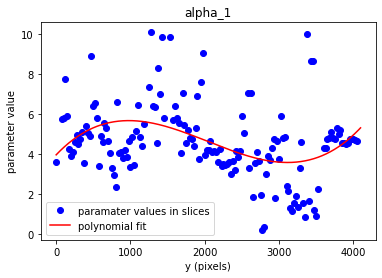

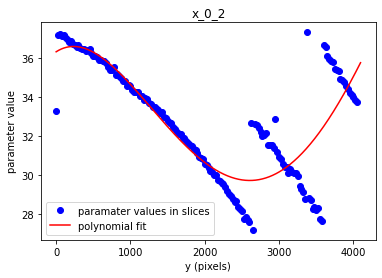

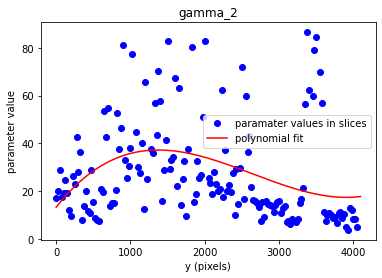

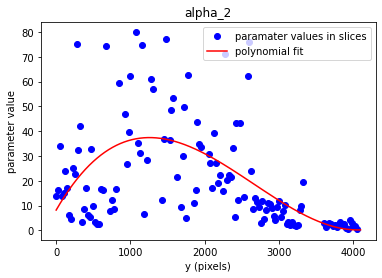

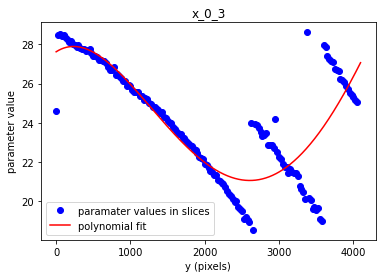

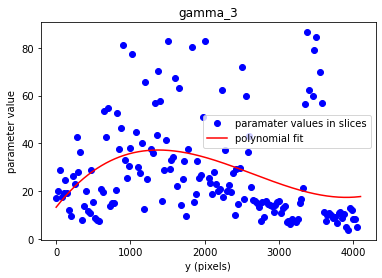

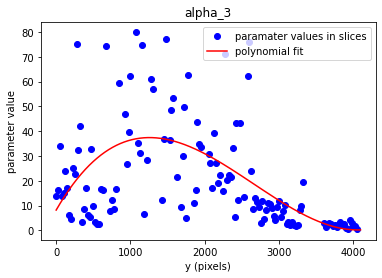

In [99]:
spec1.find_and_trace(spec.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4, 'x_0_4':4, 'mean_1':4},
                    fitrange=[0, 4100], polyorder=3)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2
Fitting polynomial of degree 4 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3


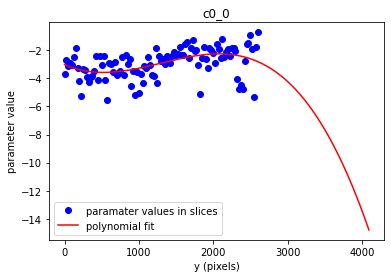

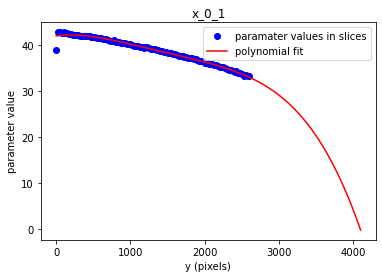

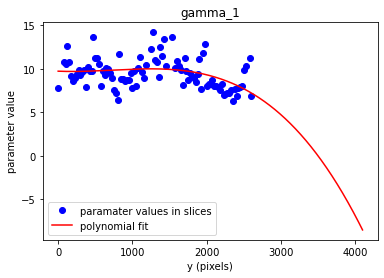

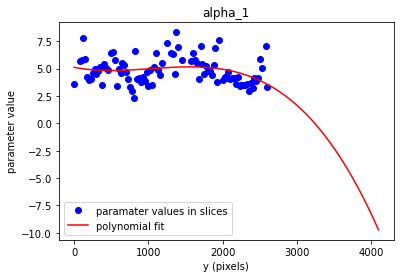

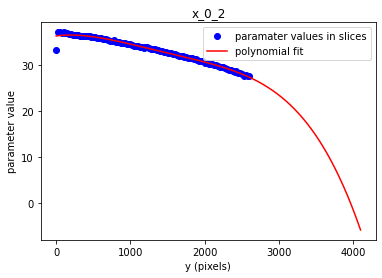

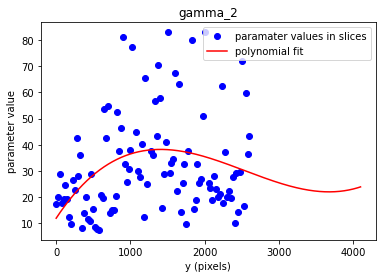

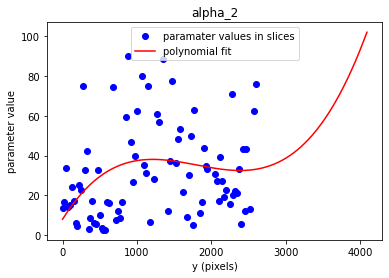

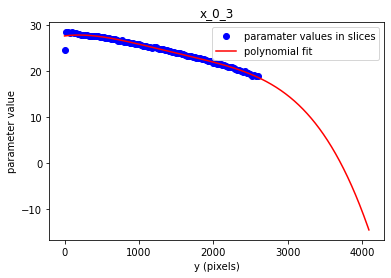

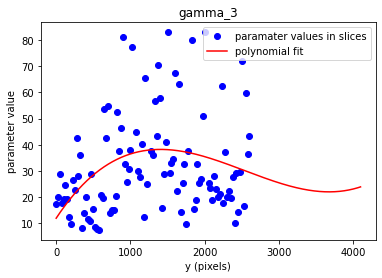

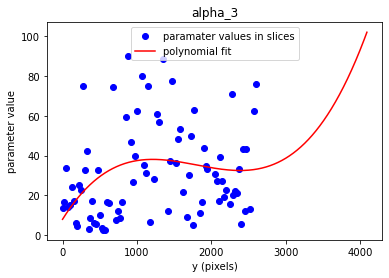

In [104]:
spec1.find_and_trace(spec.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4, 'x_0_4':4, 'mean_1':4},
                    fitrange=[0, 2625], polyorder=3)

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 2625
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  7098.84
 Spectrum End:     8804.37
 Dispersion (1st pixel):   0.57
 Dispersion (average):      0.65

 Spectrum Start:  7098.84
 Spectrum End:     8804.37
 Dispersion (1st pixel):   0.57
 Dispersion (average):      0.65

 Spectrum Start:  7098.84
 Spectrum End:     8804.37
 Dispersion (1st pixel):   0.57
 Dispersion (average):      0.65


Plotting the spectrum


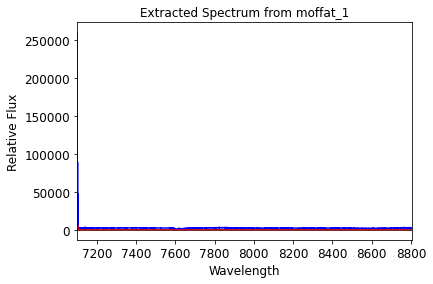

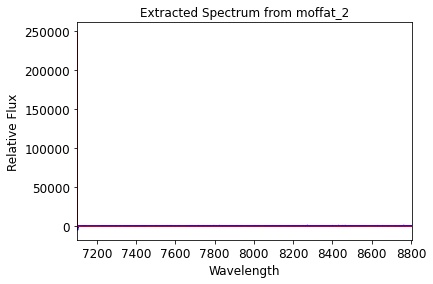

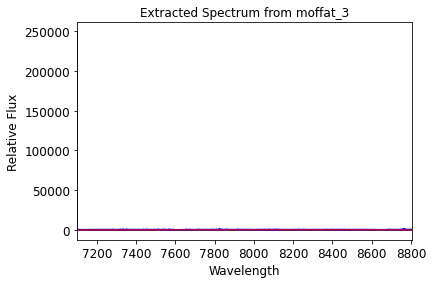

In [105]:
spec1.extract(method='modelfit', extrange=[0, 2625])#[1000, -1]

In [106]:
spec1_d = spec1d.Spec1d(wav=spec1.spectra[1][1]['wav'], flux=spec1.spectra[1][1]['flux'],
                    var=spec1.spectra[1][1]['var'])

 Spectrum Start:  7098.84
 Spectrum End:     8804.37
 Dispersion (1st pixel):   0.57
 Dispersion (average):      0.65




Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg I (b)      5176.00       7298.16
Na I (D)      5889.95       8304.83
Na I (D)      5895.92       8313.25



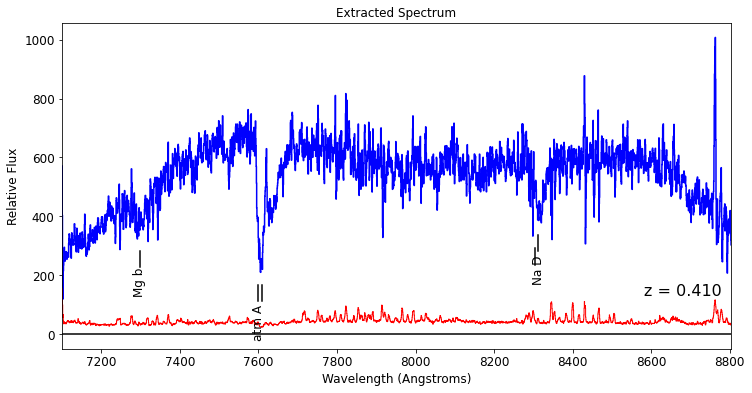

In [109]:
fg = plt.figure(figsize=(12, 6))
spec1_d.smooth(3, fig=fg)
spec1_d.mark_lines('abs', z=0.41, usesmooth=True, markatm=True, excludeline=['atm B'])